## Tree

### Задание по программированию: Бэггинг и случайный лес

In [52]:
from sklearn import model_selection, metrics, ensemble, datasets, tree
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
plt.style.use(['seaborn', 'seaborn-talk'])

warnings.filterwarnings('ignore')

In [53]:
def write_answer(number, value):
    with open(f"{number}_tree_bagging.txt", "w") as file:
        print(number, value)
        file.write(str(value))

### Данные

<Figure size 748.8x514.8 with 0 Axes>

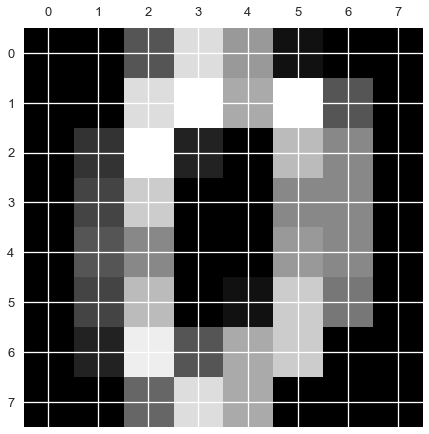

In [54]:
digits = datasets.load_digits()


X = digits['data']
y = digits['target']
plt.gray()
plt.matshow(digits.images[0])
plt.show()

### Задание 1. DecisionTreeClassifier

In [55]:
score_1 = model_selection.cross_val_score(tree.DecisionTreeClassifier(), X, y, cv=10)
write_answer(1, score_1.mean())

1 0.8263718187461204


### Задание 2. BaggingClassifier

In [56]:
score_2 = model_selection.cross_val_score(ensemble.BaggingClassifier(n_estimators=100), X, y, cv=10)
write_answer(2, score_2.mean())


2 0.9270670391061453


### Задание 3. BaggingClassifier - Изменение количества признаков

In [57]:
score_3 = model_selection.cross_val_score(ensemble.BaggingClassifier(n_estimators=100,
                                                                     max_features=int(len(X[0]) ** 0.5)),
                                          X, y, cv=10)
write_answer(3, score_3.mean())

3 0.9259869646182495


### Задание 4. BaggingClassifier. Выбор случайных признаков при построении каждом построении дерева

In [58]:
score_4 = model_selection.cross_val_score(ensemble.BaggingClassifier(
    base_estimator=tree.DecisionTreeClassifier(max_features='sqrt'), n_estimators=100),
    X, y, cv=10)
write_answer(4, score_4.mean())

4 0.9476846679081316


### Задание 5. Сравнение с RandomForestClassifier

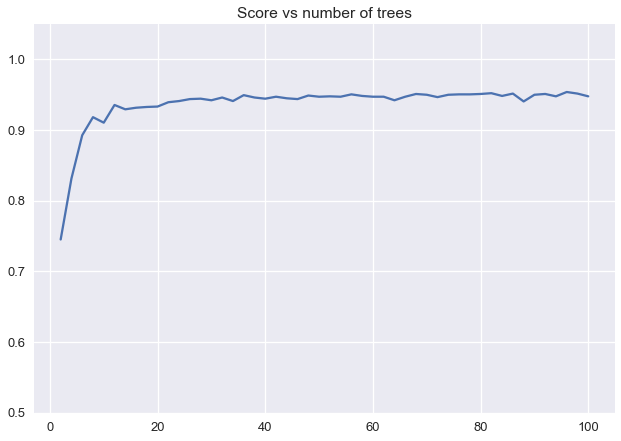

In [59]:
# Number of trees
values = []
steps = range(0, 101, 2)
for number in steps:
    rf_classifier = ensemble.RandomForestClassifier(n_estimators=number)
    value = model_selection.cross_val_score(rf_classifier, X, y, cv=10, n_jobs=-1)
    values.append(value.mean())

plt.plot(steps, values)
plt.ylim(0.5, 1.05)
plt.title('Score vs number of trees')
plt.show()

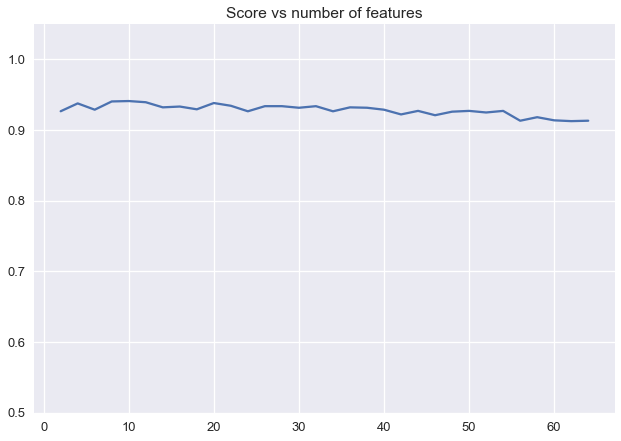

In [60]:
# Number of features
values = []
steps = range(0, 65, 2)
for number in steps:
    rf_classifier = ensemble.RandomForestClassifier(n_estimators=20, max_features=number)
    value = model_selection.cross_val_score(rf_classifier, X, y, cv=10, n_jobs=-1)
    values.append(value.mean())

plt.plot(steps, values)
plt.ylim(0.5, 1.05)
plt.title('Score vs number of features')
plt.show()

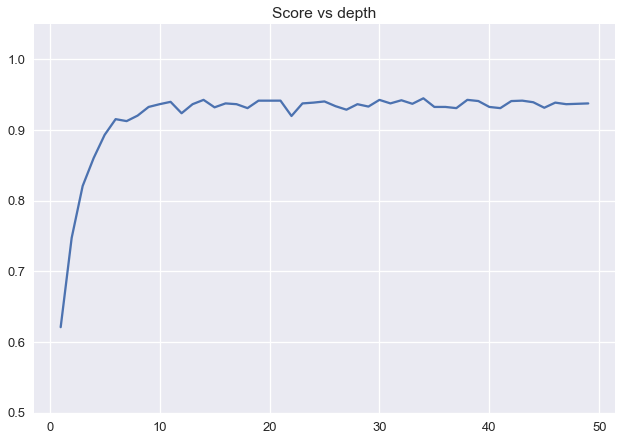

In [61]:
# Depth of tree
values = []
steps = range(0, 50, 1)
for number in steps:
    rf_classifier = ensemble.RandomForestClassifier(n_estimators=20, max_features='sqrt', max_depth=number)
    value = model_selection.cross_val_score(rf_classifier, X, y, cv=10, n_jobs=-1)
    values.append(value.mean())


plt.plot(steps, values)
plt.ylim(0.5, 1.05)
plt.title('Score vs depth')
plt.show()


In [64]:
write_answer(5, '2 3 4 7')

5 2 3 4 7
